# Further Data Investigation

## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib
import seaborn as sns
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


{
    "gender" : {
        "question" : "What is your gender?",
        "1" : "Male",
        "2" : "Female",
        "3" : "Other/No answer"
    },
    "age" : {
        "question" : "What is your age range?",
        "1" : "0-18",
        "2" : "19-25",
        "3" : "26-35",
        "4" : "36-50",
        "5" : "50-80",
        "6" : "80"
    },
    "school" : {
        "question" : "What is the highest level of school you have completed or the highest degree you have received?",
        "1" : "High school incomplete or less",
        "2" : "High school graduate or GED (includes technical/vocational training that doesn’t count towards college credit)",
        "3" : "Some college (some community college, associate’s degree)",
        "4" : "Four year college degree/bachelor’s degree",
        "5" : "Some postgraduate or professional schooling, no postgraduate degree",
        "6" : "Postgraduate or professional degree, including master’s, doctorate, medical or law degree"
    },
    "income" : {
        "question" : "Last year what was your total family income from all sources, before taxes?",
        "1" : "Less than $10,000",
        "2" : "$10,000 to less than $20,000",
        "3" : "$20,000 to less than $30,000",
        "4" : "$30,000 to less than $40,000",
        "5" : "$40,000 to less than $50,000",
        "6" : "$50,000 to less than $75,000",
        "7" : "$75,000 to less than $100,000",
        "8" : "$100,000 to less than $150,000",
        "9" : "$150,000 or more"
    },
    "party" : {
        "question" : "In politics today, do you consider yourself a:",
        "1" : "Republican",
        "2" : "Democrat",
        "3" : "Indipendent",
        "4" : "Something else"
    },
    "party_ln" : {
        "question" : "As of today do you lean more to:",
        "1" : "The Republican Party",
        "2" : "The Democratic Party"
    },
    "ideo" : {
        "question" : "In general, would you describe your political views as:",
        "1" : "Very conservative",
        "2" : "Conservative",
        "3" : "Moderate",
        "4" : "Liberal",
        "5" : "Very liberal"
    },
    "elections" : {
        "question" : "Have you voted in the 2016 US presidential election?",
        "1" : "Yes",
        "2" : "No",
        "3" : "Rather not answer"
    },
    "teaparty" : {
        "question" : "From what you know, do you agree or disagree with the Tea Party movement, or don't you have an opinion either way?",
        "1" : "Agree",
        "2" : "Disagree",
        "3" : "No opinion either way"
    }
}

## Creating needed Dataframes

In [ ]:
df = pd.read_csv("S6_Data.csv")
df2 = pd.read_csv("S100_Data.csv")

df = pd.concat([df, df2])
df = df.drop(['S6_rel', 'S100_rel'], axis=1)
df = df.iloc[::8, :]


In [ ]:
dfcorr = df.copy()

dfcorr.loc[dfcorr.elections == 3, 'elections'] = float('nan')
dfcorr.loc[dfcorr.teaparty == 3, 'teaparty'] = float('nan')
dfcorr.loc[dfcorr.gender == -1, 'gender'] = float('nan')

dfcorr['republican'] = 0
dfcorr['democrat'] = 0
dfcorr['independent'] = 0
dfcorr['somethingElse'] = 0

#renaming party
dfcorr.loc[dfcorr.party == 1, 'republican'] = 1
dfcorr.loc[dfcorr.party == 2, 'democrat'] = 1
dfcorr.loc[dfcorr.party == 3, 'independent'] = 1
dfcorr.loc[dfcorr.party == 4, 'somethingElse'] = 1

dfcorr = dfcorr.drop(columns=['party', 'position_in_task', 'off_page_count'])

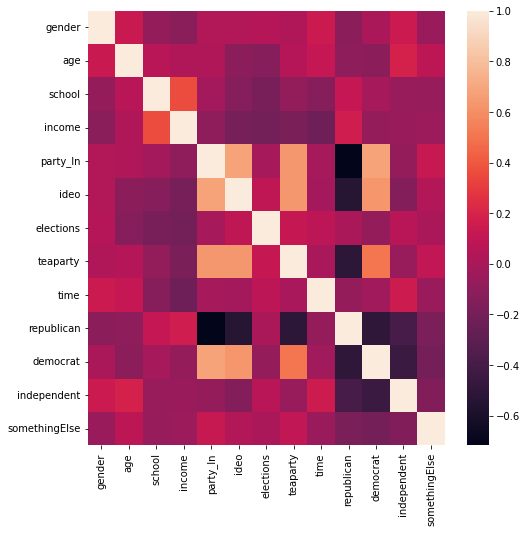

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))   
sns.heatmap(dfcorr.corr(), ax=ax);

In [ ]:
c = dfcorr.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending = False)

so = so[int(math.sqrt(len(so)))::2]
so = so[:14]

print(so)

republican  party_ln       0.717125
democrat    party_ln       0.682975
party_ln    ideo           0.681680
            teaparty       0.634963
ideo        teaparty       0.633810
            democrat       0.624698
republican  ideo           0.538724
teaparty    republican     0.514630
democrat    teaparty       0.506314
            republican     0.504686
            independent    0.454257
republican  independent    0.390356
income      school         0.361478
            time           0.233069
dtype: float64


In [ ]:
#renaming Gender
df.loc[df.gender == 1, 'gender'] = 'Male'
df.loc[df.gender == 2, 'gender'] = 'Female'
df.loc[df.gender == -1, 'gender'] = 'Other/No Answer'

#renaming party_in
df.loc[df.party_ln == 1, 'party_ln'] = 'The Republican Party'
df.loc[df.party_ln == 2, 'party_ln'] = 'The Democratic Party'

In [ ]:
select_df = df.loc[:, df.columns.intersection(['party_ln','income','gender', 'school','age'])]
rep_df = select_df[select_df.party_ln != 'The Democratic Party']
dem_df = select_df[select_df.party_ln != 'The Republican Party']

## Creating Plots

Text(0.5, 1.0, 'Gender')

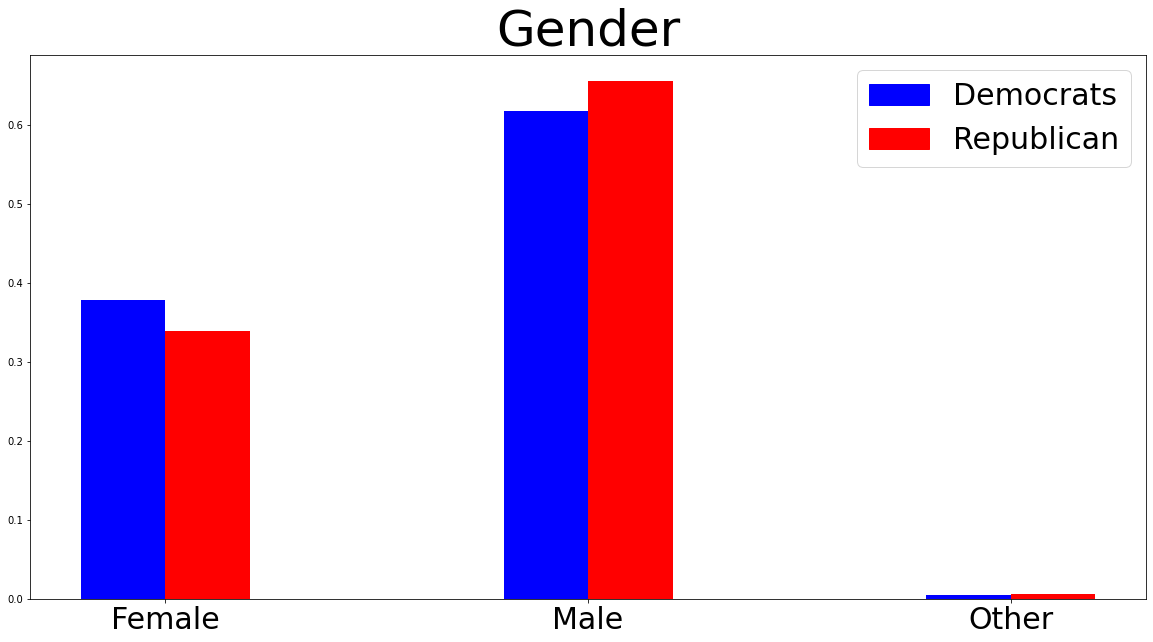

In [ ]:
#Gender
merged = pd.DataFrame(dict(
    dem=[82/217, 134/217, 1/217],
    rep=[62/183, 120/183, 1/183]
    ))


fig = plt.figure(figsize=(20, 10))

labels = ["Female", "Male", "Other"]


ab_bar_list = [plt.bar(labels, merged.rep, align='edge', width= 0.2, color = "red")]
cd_bar_list = [plt.bar(labels, merged.dem, align='edge',width= -0.2, color = "blue")]

orange_patch = mpatches.Patch(color='blue', label='Democrats')
blue_patch = mpatches.Patch(color='red', label='Republican')

plt.xticks(fontsize=30)
plt.legend(handles=[orange_patch, blue_patch], fontsize = 30)
plt.title("Gender", fontsize = 50)

Text(0.5, 1.0, 'Age')

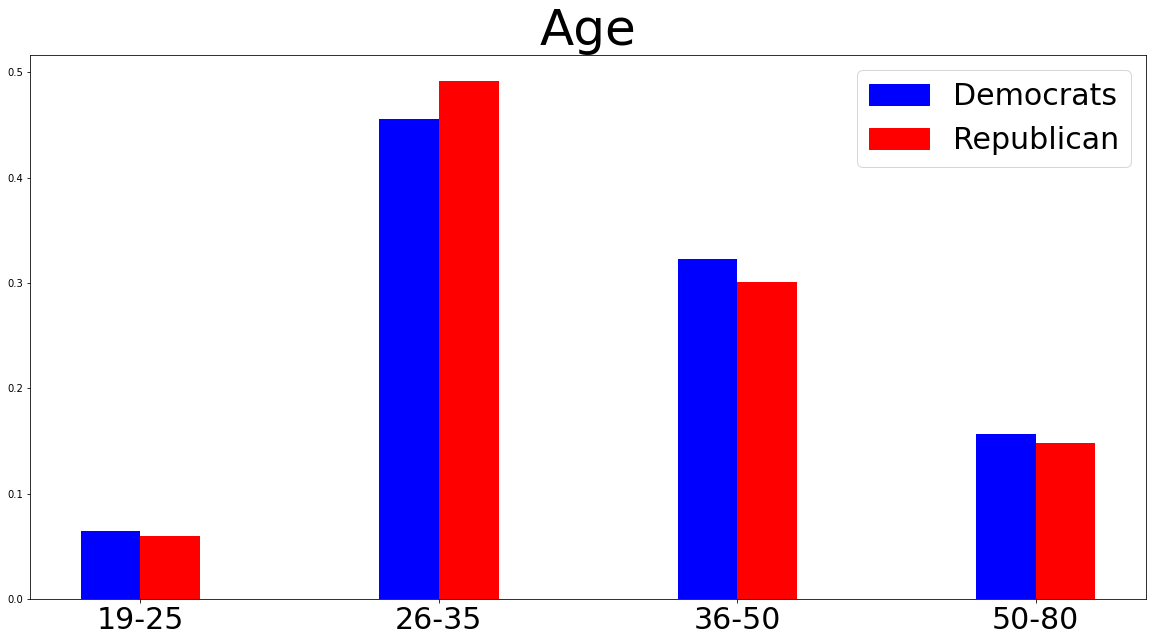

In [ ]:
#age
merged = pd.DataFrame(dict(
    rep=[11/183, 90/183, 55/183, 27/183,], #republican blue
    dem=[14/217, 99/217, 70/217, 34/217,])) #democrats orange

fig = plt.figure(figsize=(20, 10))

labels = ["19-25", "26-35", "36-50","50-80"]


ab_bar_list = [plt.bar(labels, merged.rep, align='edge', width= 0.2, color = "red")]
cd_bar_list = [plt.bar(labels, merged.dem, align='edge',width= -0.2, color = "blue")]

orange_patch = mpatches.Patch(color='blue', label='Democrats')
blue_patch = mpatches.Patch(color='red', label='Republican')

plt.xticks(fontsize=30)
plt.legend(handles=[orange_patch, blue_patch], fontsize = 30)
plt.title("Age", fontsize = 50)

Text(0.5, 1.0, 'Income')

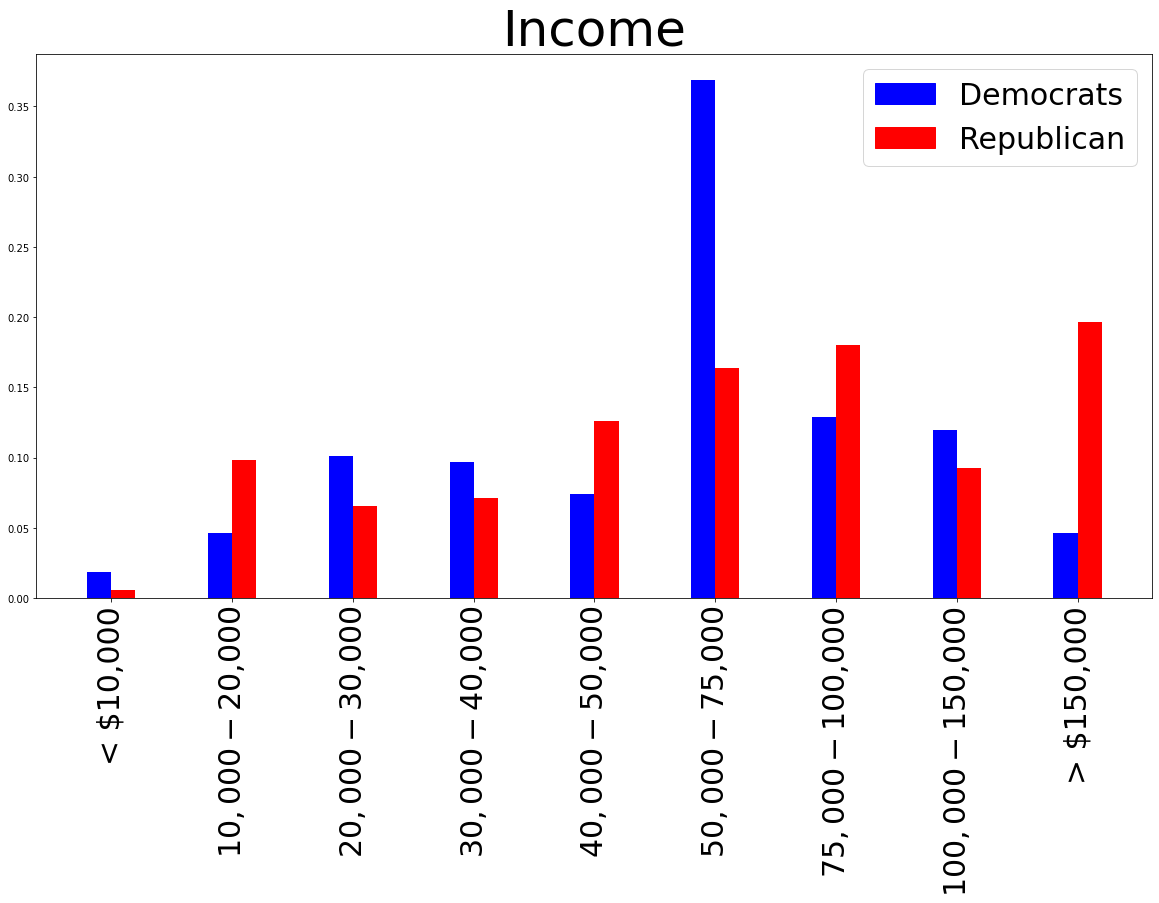

In [ ]:
#income
merged = pd.DataFrame(dict(
    rep=[1/183, 18/183, 12/183, 13/183, 23/183, 30/183, 33/183, 17/183, 36/183], #republican blue
    dem=[4/217, 10/217, 22/217, 21/217, 16/217, 80/217, 28/217, 26/217, 10/217])) #democrats orange


fig = plt.figure(figsize=(20, 10))

labels = ["< $10,000","$10,000 - $20,000","$20,000 - $30,000", "$30,000 - $40,000", "$40,000 - $50,000","$50,000 - $75,000","$75,000 - $100,000","$100,000 - $150,000","> $150,000"]


ab_bar_list = [plt.bar(labels, merged.rep, align='edge', width= 0.2, color = "red")]
cd_bar_list = [plt.bar(labels, merged.dem, align='edge',width= -0.2, color = "blue")]

orange_patch = mpatches.Patch(color='blue', label='Democrats')
blue_patch = mpatches.Patch(color='red', label='Republican')

plt.xticks(fontsize=30, rotation = 90)
plt.legend(handles=[orange_patch, blue_patch], fontsize = 30)
plt.title("Income", fontsize = 50)

Text(0.5, 1.0, 'School')

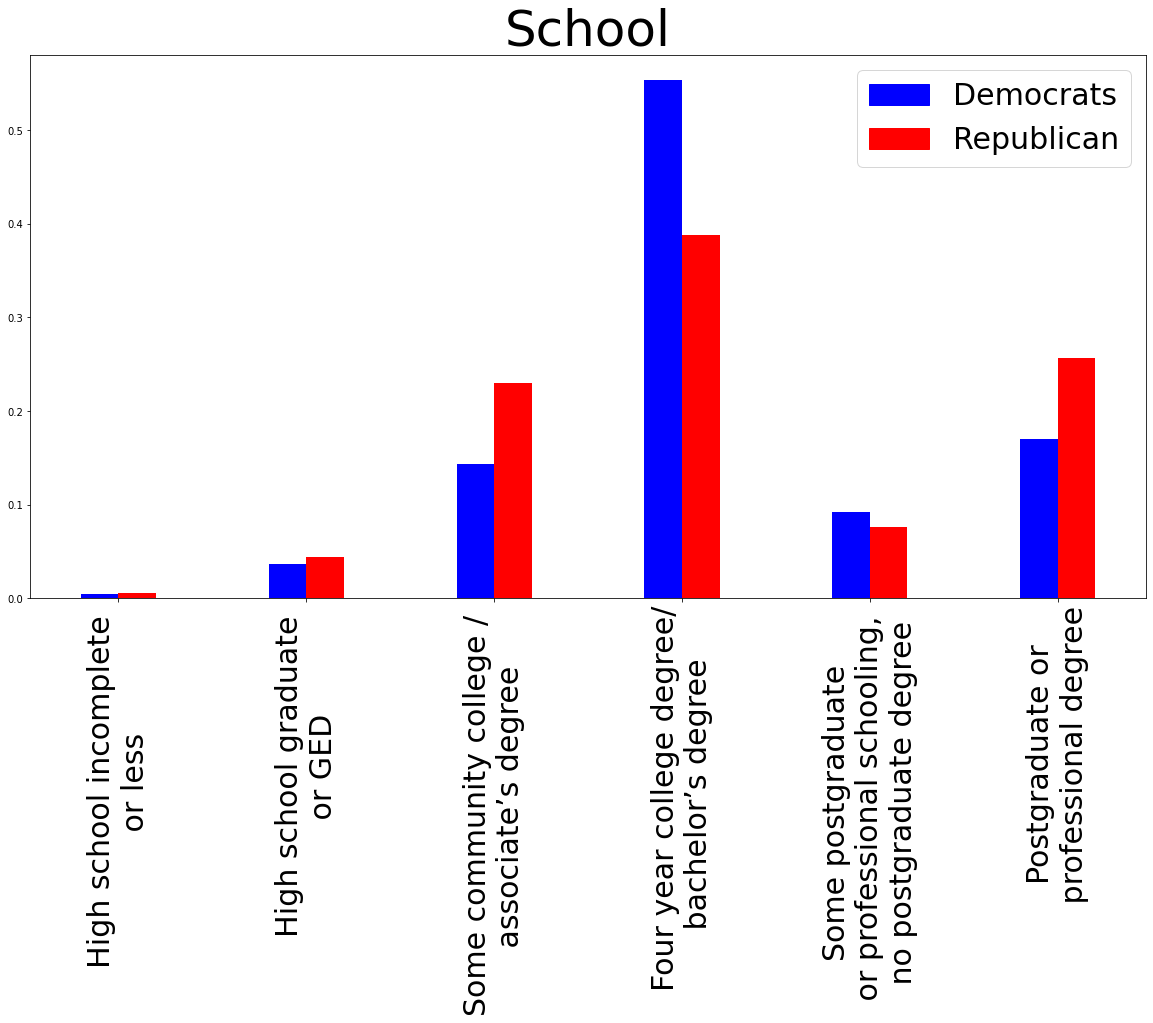

In [ ]:
#school
merged = pd.DataFrame(dict(
    rep=[1/183, 8/183, 42/183, 71/183, 14/183, 47/183], #republican blue
    dem=[1/217, 8/217, 31/217, 120/217, 20/217, 37/217])) #democrats orange

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20, 10))

labels = ["High school incomplete \n or less", "High school graduate \n or GED", "Some community college / \n associate’s degree","Four year college degree/\n bachelor’s degree",
"Some postgraduate \n or professional schooling, \n no postgraduate degree",
"Postgraduate or \n professional degree"]

ab_bar_list = [plt.bar(labels, merged.rep, align='edge', width= 0.2, color = "red")]
cd_bar_list = [plt.bar(labels, merged.dem, align='edge',width= -0.2, color = "blue")]

orange_patch = mpatches.Patch(color='blue', label='Democrats')
blue_patch = mpatches.Patch(color='red', label='Republican')

plt.xticks(fontsize=30, rotation = 90)
plt.legend(handles=[orange_patch, blue_patch], fontsize = 30)
plt.title("School", fontsize = 50)

In [ ]:
#onehotencode gender
select_df.loc[select_df.gender == 'Female', 'gender'] = 1
select_df.loc[select_df.gender == 'Male', 'gender'] = 0
select_df.loc[select_df.gender == 'Other/No Answer', 'gender'] = float("nan")

#onehotencode target variable
select_df.loc[select_df.party_ln == 'The Democratic Party', 'party_ln'] = 1
select_df.loc[select_df.party_ln == 'The Republican Party', 'party_ln'] = 0

select_df = select_df.dropna()

## Logistic Regression

In [ ]:
X = select_df.drop(columns=['party_ln'])
y = select_df['party_ln']
y = y.astype('int') 

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=10).fit(X, y)
model.predict_proba(X)
model.predict(X)
model.score(X, y)

array([[ 51, 131],
       [ 32, 184]])

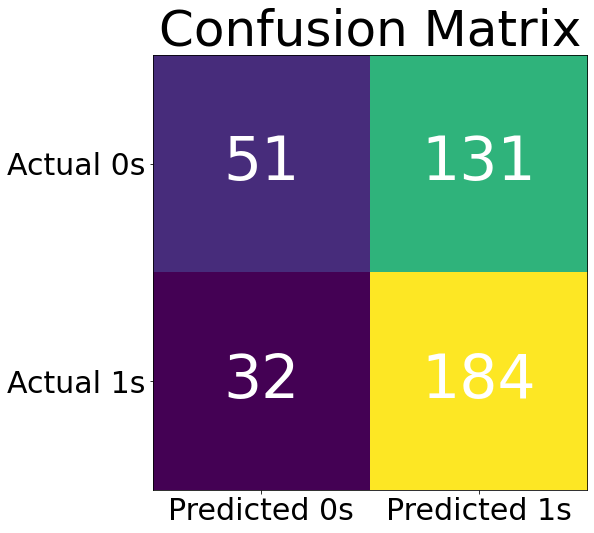

In [ ]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize = 60)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.set_title("Confusion Matrix", fontsize = 50)
plt.show()


In [ ]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.61      0.28      0.38       182
           1       0.58      0.85      0.69       216

    accuracy                           0.59       398
   macro avg       0.60      0.57      0.54       398
weighted avg       0.60      0.59      0.55       398



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7373d0f7-b35e-460a-b7ec-c43f8d39233d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>